In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [150]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [151]:
df = pd.read_csv('credit_train.csv')
df.head(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714.0,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,Fully Paid,215952.0,Short Term,739.0,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,NaN,20.0,0.0,669560.0,1021460.0,0.0,0.0


# Data Understanding

In [152]:
df.shape

(100514, 19)

In [153]:
df[-515:].head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
99999,c63916c6-6d46-47a9-949a-51d09af4414f,1b3014be-5c07-4d41-abe7-44573c375886,Fully Paid,99999999.0,Short Term,743.0,935180.0,NaN,Own Home,Debt Consolidation,9118.1,13.0,NaN,4.0,1.0,45600.0,91014.0,1.0,0.0
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Data  after the 99999th rows are all null, so we will remove it.

In [154]:
df1 = df[:-514]

In [155]:
df1.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070.0,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,NaN,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0
99999,c63916c6-6d46-47a9-949a-51d09af4414f,1b3014be-5c07-4d41-abe7-44573c375886,Fully Paid,99999999.0,Short Term,743.0,935180.0,NaN,Own Home,Debt Consolidation,9118.10,13.0,NaN,4.0,1.0,45600.0,91014.0,1.0,0.0


In [156]:
df1.shape

(100000, 19)

In [157]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null 

In [158]:
df1.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


# Data Preprocessing and Visualization

In [159]:
# Dropping the column 'Loan ID' and 'Customer ID' because these two columns are only for Identification
data = df1.drop(['Loan ID', 'Customer ID'], axis=1)

In [160]:
data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [161]:
# Checking the null values in %
((data.isnull().sum()/len(data))*100).sort_values(ascending=False)

Months since last delinquent    53.141
Credit Score                    19.154
Annual Income                   19.154
Years in current job             4.222
Bankruptcies                     0.204
Tax Liens                        0.010
Maximum Open Credit              0.002
Current Credit Balance           0.000
Number of Credit Problems        0.000
Number of Open Accounts          0.000
Loan Status                      0.000
Years of Credit History          0.000
Current Loan Amount              0.000
Purpose                          0.000
Home Ownership                   0.000
Term                             0.000
Monthly Debt                     0.000
dtype: float64

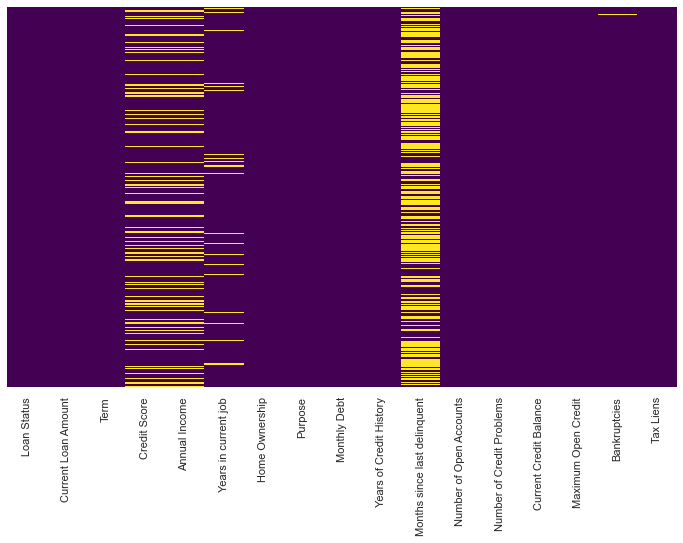

In [162]:
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(data.isnull(), yticklabels=False, cmap="viridis", cbar=False,ax=ax)
plt.show()

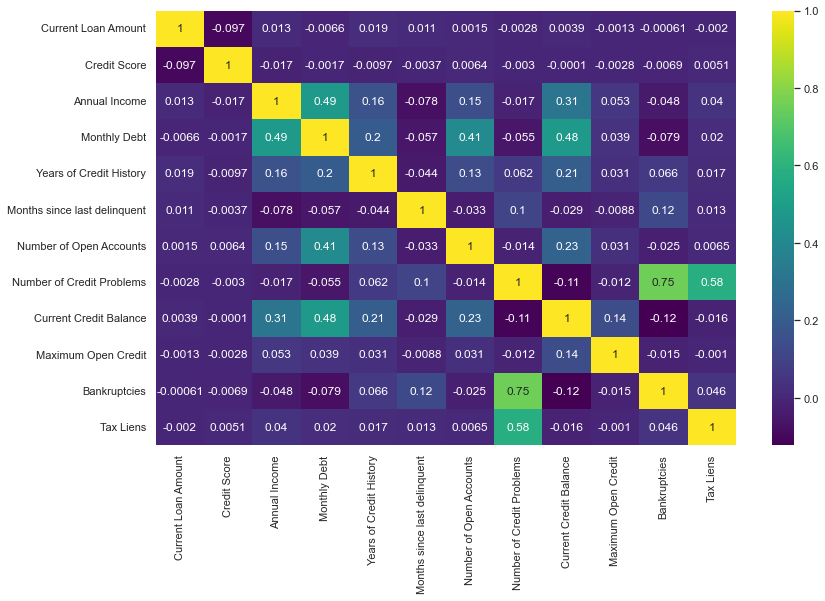

In [163]:
# I plotted a Heat map to find any relation among variables

plt.figure(figsize=(13,8))
sns.heatmap(data.corr(), annot=True,cmap='viridis')
plt.show()

## We already know we're predicting categorical variables hence we have to convert our cateorical variables into discrete

## 1. 'Loan Status' Column

* Loan Status is the categorical variable here denoting if the certain variable is paid off or not. We aim to predict that as our final output

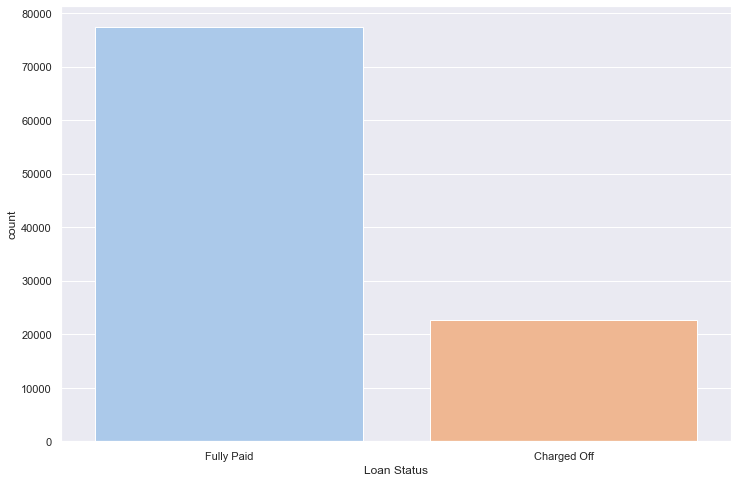

In [164]:
plt.figure(figsize=(12,8))
sns.countplot(data['Loan Status'], palette = 'pastel')
plt.show()

In [165]:
data['Loan Status'] = data['Loan Status'].map({'Charged Off':0, 'Fully Paid':1})

In [166]:
((data['Loan Status'].value_counts()/len(data))*100)

1    77.361
0    22.639
Name: Loan Status, dtype: float64

## 2. 'Current Loan Amount' Column

In [167]:
data['Current Loan Amount'].value_counts().head()

99999999.0    11484
223102.0         27
223322.0         27
216194.0         27
223652.0         27
Name: Current Loan Amount, dtype: int64

In [168]:
data = data[data['Current Loan Amount'] != 99999999.0]

In [169]:
data.shape

(88516, 17)

In [170]:
mean_loan = data['Current Loan Amount'].mean()
std_loan = data['Current Loan Amount'].std()
lowrange = mean_loan - std_loan
highrange = mean_loan + std_loan
print(lowrange, highrange)

126051.43019084723 498575.76557037106


In [171]:
def loan_amo(x):
    if x <= lowrange:
         return 'Small Loan'
    elif x > lowrange and x < highrange:
        return 'Medium Loan'
    else:
        return 'Big Loan'

In [172]:
data['Current Loan Amount'] = data['Current Loan Amount'].apply(loan_amo)

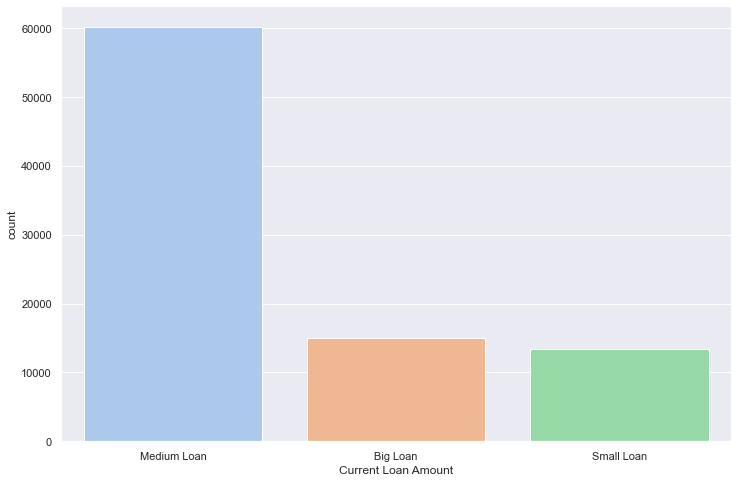

In [173]:
plt.figure(figsize=(12,8))
sns.countplot(data['Current Loan Amount'], palette = 'pastel')
plt.show()

In [174]:
data = data.join(pd.get_dummies(data['Current Loan Amount'],drop_first = True))

In [175]:
data = data.drop(['Current Loan Amount'], axis=1)

In [176]:
data.head()

,Loan Status,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Medium Loan,Small Loan
0,1,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,1,0
1,1,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,1,0
3,1,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,1,0
4,1,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,1,0
5,0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0,1,0


## 3. 'Term' Column

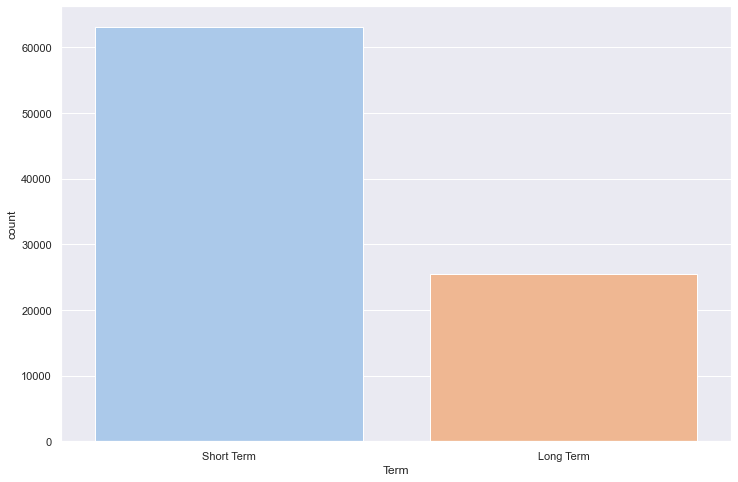

In [177]:
plt.figure(figsize=(12,8))
sns.countplot(data['Term'], palette = 'pastel')
plt.show()

In [178]:
data['Term'] = data['Term'].map({'Short Term':0, 'Long Term':1})

In [179]:
data.head()

,Loan Status,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Medium Loan,Small Loan
0,1,0,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,1,0
1,1,0,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,1,0
3,1,1,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,1,0
4,1,0,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,1,0
5,0,0,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0,1,0


## 4. 'Credit Score' Column

In [180]:
data['Credit Score'].mean()

1134.5209769037801

* If you notice the average credit scoe is 1076+ which is strange considering the credit score are within the range of 300-850

In [181]:
data[data['Credit Score']>850].head()

,Loan Status,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Medium Loan,Small Loan
5,0,0,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0,1,0
43,0,0,7120.0,537472.0,10+ years,Rent,Debt Consolidation,5777.90,14.8,NaN,4.0,0.0,132468.0,164406.0,0.0,0.0,1,0
51,0,1,6610.0,527839.0,10+ years,Rent,Debt Consolidation,14207.63,17.0,48.0,9.0,0.0,254277.0,379918.0,0.0,0.0,1,0
56,0,0,7380.0,728726.0,4 years,Rent,major_purchase,10135.36,11.4,NaN,8.0,0.0,104633.0,199936.0,0.0,0.0,0,1
65,0,1,7370.0,1028774.0,6 years,Home Mortgage,Debt Consolidation,22632.99,19.3,NaN,5.0,0.0,474658.0,742720.0,0.0,0.0,0,0


* it looks like some of the credit score are just scaled up by 10, we now scaling them back

In [182]:
data['Credit Score'] = data['Credit Score'].apply(lambda x: (x/10) if x>850 else x)

In [183]:
data['Credit Score'].mean()

714.7275885931779

* we take separate average of credit score of people with short term loan and separate average of people with long term loan and then fill the missing credit score looking up at the term of the loan.

In [184]:
data['Credit Score'].isnull().sum()

19154

In [185]:
cs_df = data[data['Term']==0]
avg = cs_df['Credit Score'].mean()
print(avg)

723.3420212875466


In [186]:
cs_df1 = data[data['Term']==1]
avg1 = cs_df1['Credit Score'].mean()
print(avg1)

694.6001731685026


In [187]:
data.loc[(data.Term ==0) & (data['Credit Score'].isnull()),'Credit Score'] = avg

In [188]:
data.loc[(data.Term ==1) & (data['Credit Score'].isnull()),'Credit Score'] = avg1

In [189]:
data.head()

,Loan Status,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Medium Loan,Small Loan
0,1,0,709.000000,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,1,0
1,1,0,723.342021,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,1,0
3,1,1,721.000000,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,1,0
4,1,0,723.342021,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,1,0
5,0,0,729.000000,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0,1,0


In [190]:
from IPython.display import display
from PIL import Image

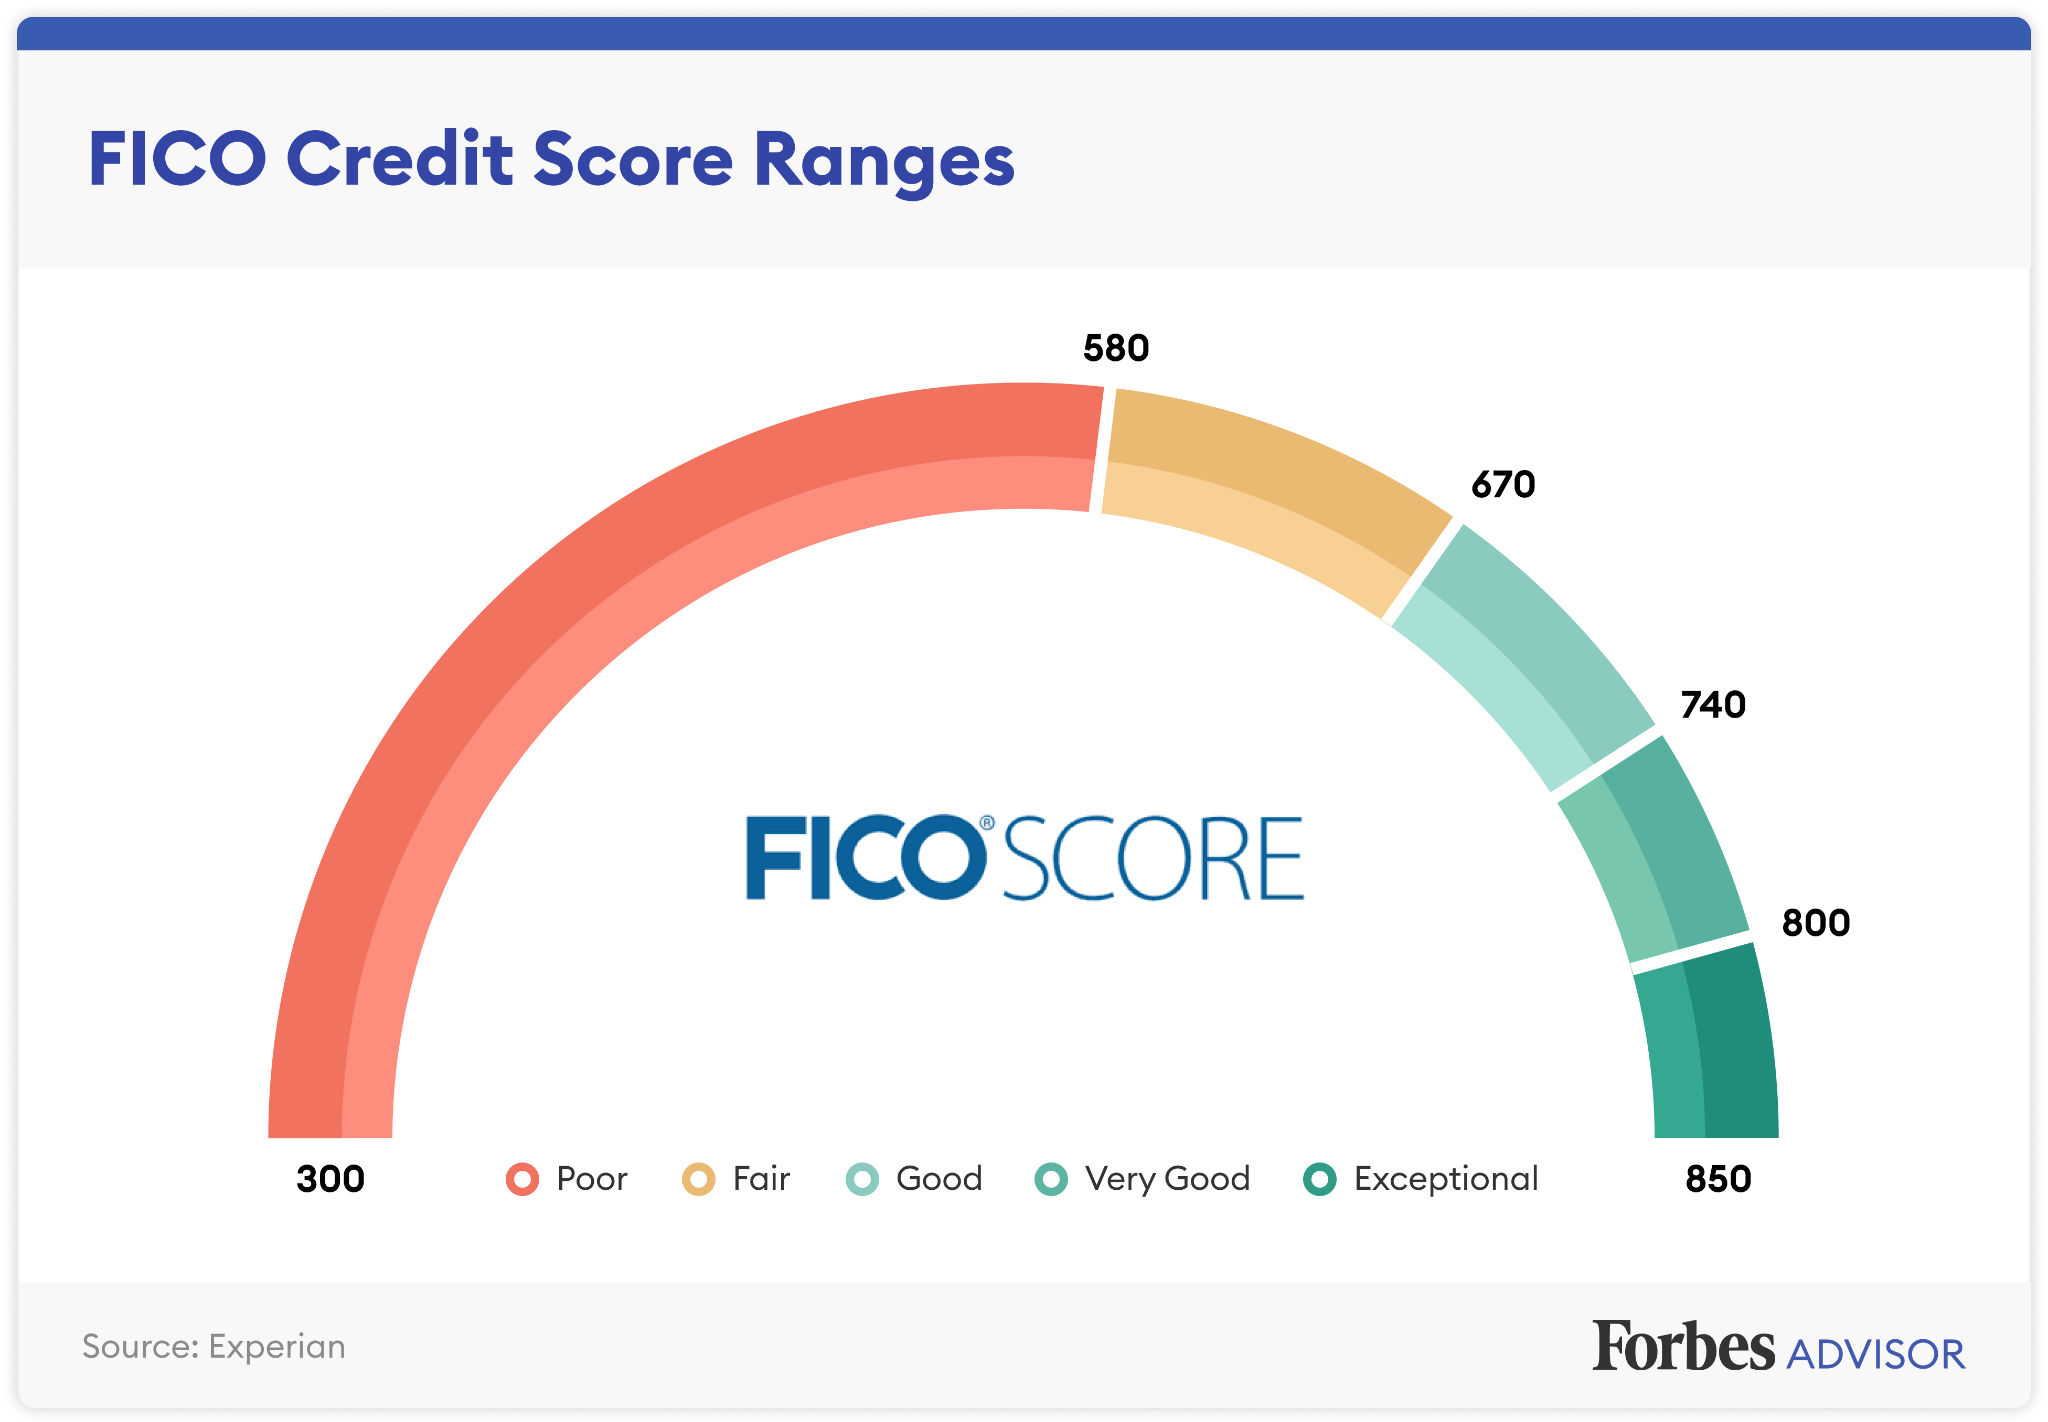

In [191]:
path=r'C:\Users\DELL\Downloads\Fico-Score.png'
display(Image.open(path))

In [192]:
def scoring(x):
    if x < 580:
         return 'Credit Poor'
    elif (x >= 580 and x < 670):
        return 'Credit Average'
    elif (x >= 670 and x < 740):
        return 'Credit Good'
    elif (x >= 740 and x < 800):
        return 'Credit Very Good'
    else:
        return 'Credit Exceptional'

In [193]:
data['Credit Score'] = data['Credit Score'].apply(scoring)

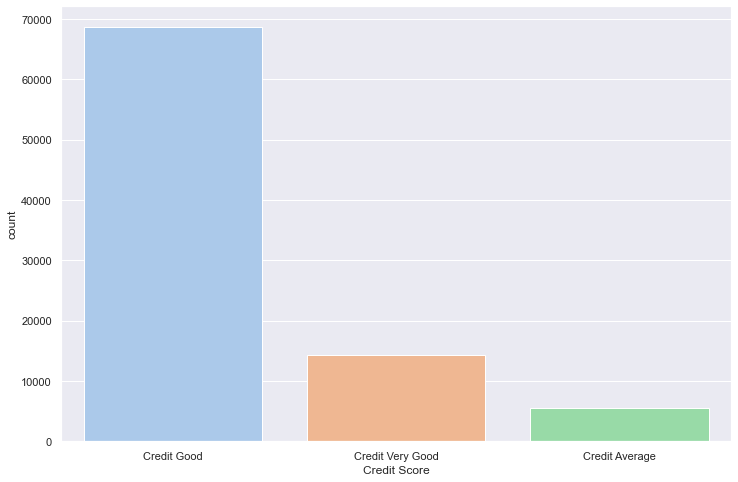

In [194]:
plt.figure(figsize=(12,8))
sns.countplot(data['Credit Score'], palette = 'pastel')
plt.show()

In [195]:
data = data.join(pd.get_dummies(data['Credit Score'], drop_first = True))

In [196]:
data = data.drop(['Credit Score'], axis=1)

In [197]:
data.head()

,Loan Status,Term,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Medium Loan,Small Loan,Credit Good,Credit Very Good
0,1,0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,1,0,1,0
1,1,0,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,1,0,1,0
3,1,1,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,1,0,1,0
4,1,0,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,1,0,1,0
5,0,0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0,1,0,1,0


## 5. 'Annual Income' Column

In [198]:
data['Annual Income'].isnull().sum()

19154

In [199]:
data['Annual Income'].fillna(data['Annual Income'].mean(), inplace=True)

In [200]:
mean_inc = data['Annual Income'].mean()
std_inc = data['Annual Income'].std()
poorline = mean_inc -  std_inc
richline = mean_inc + std_inc

In [201]:
def ann_inc(x):
    if x <= poorline:
         return 'Low Income'
    elif x > poorline and x < richline:
        return 'Average Income'
    else:
        return 'High Income'

In [202]:
data['Annual Income'] = data['Annual Income'].apply(ann_inc)

In [203]:
data = data.join(pd.get_dummies(data['Annual Income'],drop_first = True))

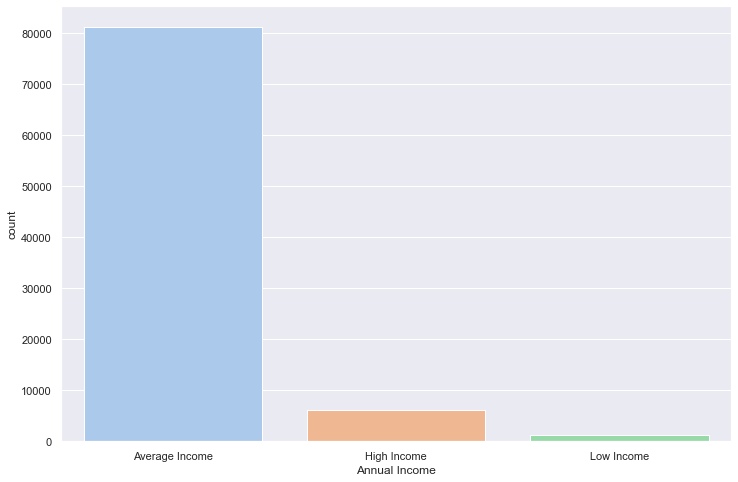

In [204]:
plt.figure(figsize=(12,8))
sns.countplot(data['Annual Income'], palette = 'pastel')
plt.show()

In [205]:
data = data.drop(['Annual Income'], axis=1)

In [206]:
data.head()

,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Medium Loan,Small Loan,Credit Good,Credit Very Good,High Income,Low Income
0,1,0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,1,0,1,0,0,0
1,1,0,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,1,0,1,0,0,0
3,1,1,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,1,0,1,0,0,0
4,1,0,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,1,0,1,0,0,0
5,0,0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0,1,0,1,0,0,0


## 6. 'Years in current job' Column

* Age of employment is one of the major factor in deciding the person's financial stability and secure income sources. Here our data was a String with non uniform spread. first we need to extract the given numbers from our data and then give it a unform range to convert it into a categorical variable

In [207]:
data['Years in current job']=data['Years in current job'].str.extract(r"(\d+)")

In [208]:
data['Years in current job']=data['Years in current job'].astype(float)

In [209]:
data['Years in current job'].value_counts().head()

10.0    27541
1.0     12960
2.0      8019
3.0      7222
5.0      5990
Name: Years in current job, dtype: int64

In [210]:
data['Years in current job'].fillna(10, inplace=True)

In [211]:
def injob(x):
    if x < 4:
         return 'Emp Level Jr.'
    elif x>4 and x<8:
        return 'Emp Level Mid'
    else:
        return 'Emp Senior'

In [212]:
data['Employment History'] = data['Years in current job'].apply(injob)

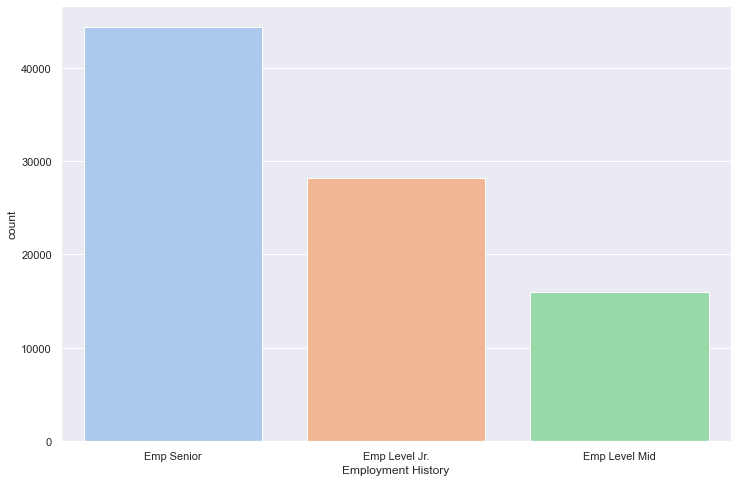

In [213]:
plt.figure(figsize=(12,8))
sns.countplot(data['Employment History'], palette = 'pastel')
plt.show()

In [214]:
data = data.drop(['Years in current job'], axis=1)

In [215]:
data = data.join(pd.get_dummies(data['Employment History'],drop_first = True))

In [216]:
data = data.drop(['Employment History'], axis=1)

In [217]:
data.head()

,Loan Status,Term,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Medium Loan,Small Loan,Credit Good,Credit Very Good,High Income,Low Income,Emp Level Mid,Emp Senior
0,1,0,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,1,0,1,0,0,0,0,1
1,1,0,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,1,0,1,0,0,0,0,1
3,1,1,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,1,0,1,0,0,0,0,0
4,1,0,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,1,0,1,0,0,0,1,0
5,0,0,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0,1,0,1,0,0,0,0,1


## 7. 'Home Ownership' Column

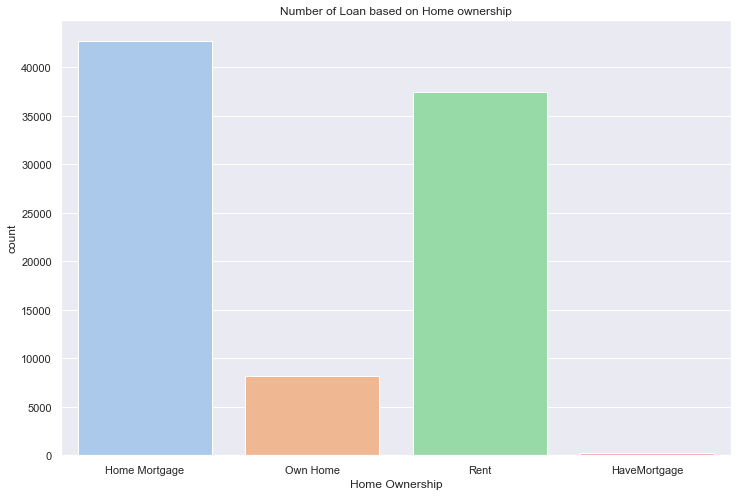

In [218]:
plt.figure(figsize=(12,8))
sns.countplot(data['Home Ownership'], palette = 'pastel')
plt.title('Number of Loan based on Home ownership')
plt.show()

* As we can see most of the loans have been either by the people have mortgage on their home or by people who are in rent

In [219]:
data = data.join(pd.get_dummies(data['Home Ownership'],drop_first = True))

In [220]:
data = data.drop(['Home Ownership'], axis=1)


## 8. 'Purpose' Column

In [221]:
data['Purpose'].value_counts()

Debt Consolidation      69506
other                    5409
Home Improvements        5124
Other                    2849
Business Loan            1451
Buy a Car                1088
Medical Bills             996
Buy House                 605
Take a Trip               510
major_purchase            307
small_business            257
moving                    130
wedding                    95
vacation                   94
Educational Expenses       85
renewable_energy           10
Name: Purpose, dtype: int64

In [222]:
data['Purpose'] = data['Purpose'].str.replace('other','Other')

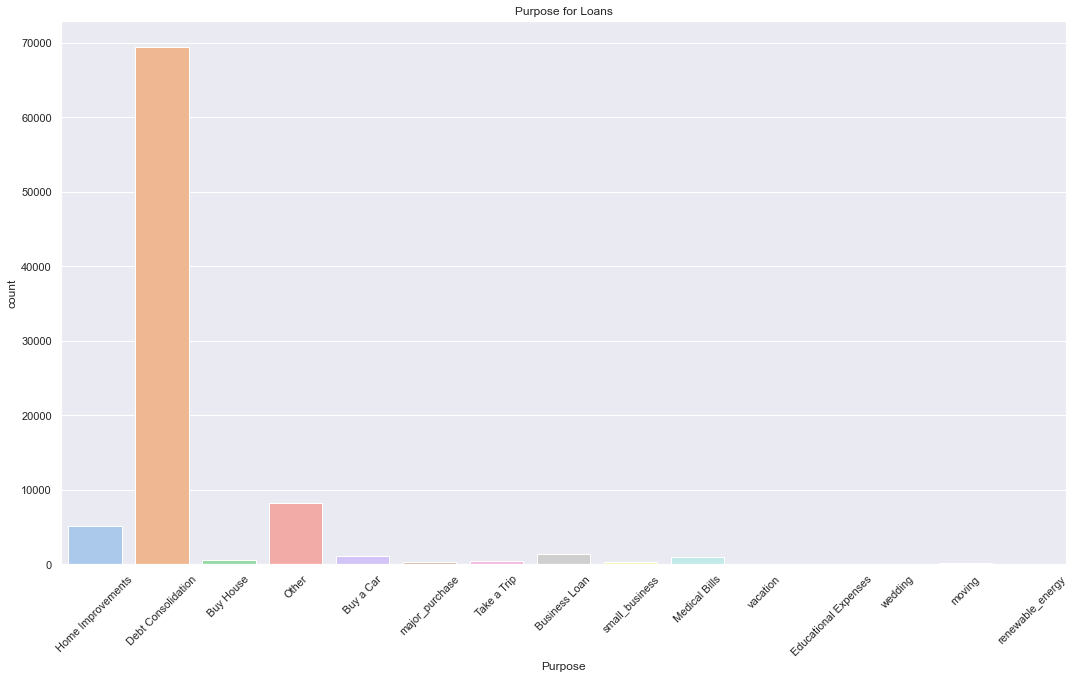

In [223]:
plt.figure(figsize=(18,10))
sns.countplot(data['Purpose'], palette = 'pastel')
plt.title('Purpose for Loans')
plt.xticks(rotation=45)
plt.show()

* The Purpose chart show that 'Business Loan, Consildation,buy a house and Improvement' are the Top 4 for reason for loana application,However the purpose could not tell us if someone will pay in full or not


In [224]:
purpostatus = data[['Purpose','Loan Status']]
purpostatus.head()

,Purpose,Loan Status
0,Home Improvements,1
1,Debt Consolidation,1
3,Debt Consolidation,1
4,Debt Consolidation,1
5,Debt Consolidation,0


<AxesSubplot:title={'center':'Purpose of Loan Vs Loan Payment Status'}, xlabel='Purpose'>

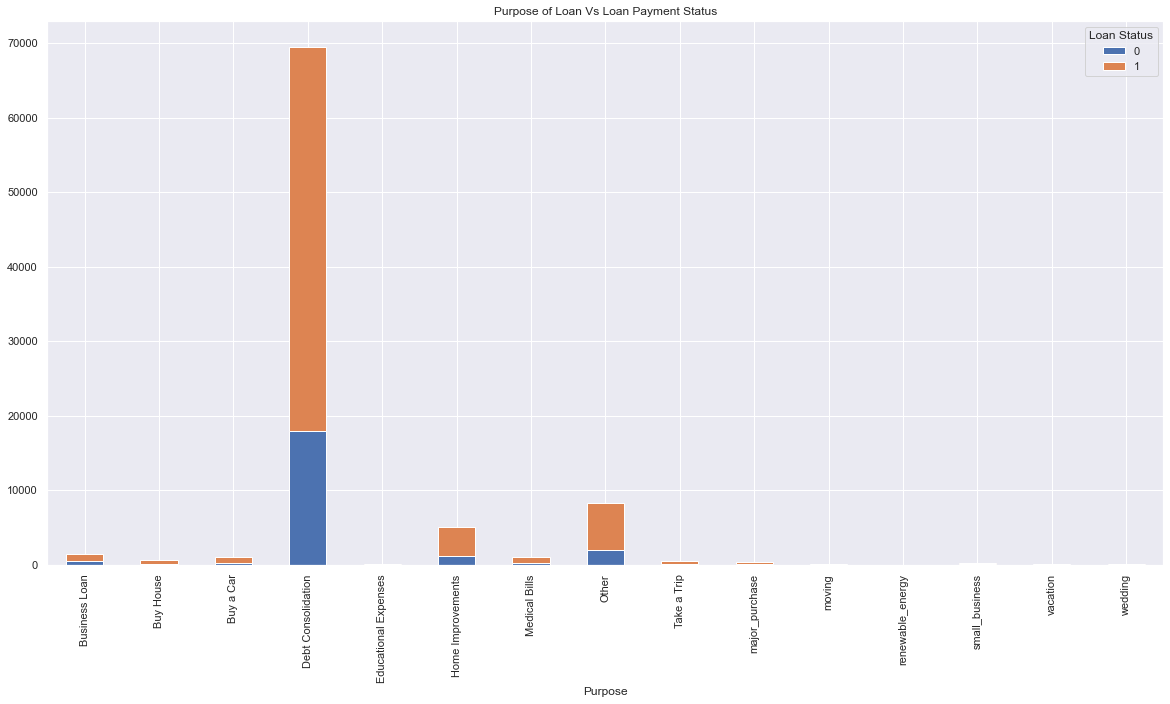

In [225]:
pd.crosstab(purpostatus['Purpose'], purpostatus['Loan Status']).plot(kind='bar', stacked=True, figsize=(20,10), 
                                                                                 title="Purpose of Loan Vs Loan Payment Status", )

In [226]:
def purp(x):
    if x == 'Debt Consolidation':
         return 1
    elif x == 'Other':
        return 2
    elif x == 'Home Improvements':
        return 3
    else:
        return 4

In [227]:
data['Purpose'] = data['Purpose'].apply(purp)

In [228]:
data.head()

,Loan Status,Term,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Medium Loan,Small Loan,Credit Good,Credit Very Good,High Income,Low Income,Emp Level Mid,Emp Senior,Home Mortgage,Own Home,Rent
0,1,0,3,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,1,0,1,0,0,0,0,1,1,0,0
1,1,0,1,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,1,0,1,0,0,0,0,1,1,0,0
3,1,1,1,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,1,0,1,0,0,0,0,0,0,1,0
4,1,0,1,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,1,0,1,0,0,0,1,0,0,0,1
5,0,0,1,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0,1,0,1,0,0,0,0,1,1,0,0


## 9. 'Years of Credit History' Columns

* The length of your credit history, or how long you’ve been using credit, typically accounts for 15 percent of your total credit score.

* Generally, the longer your credit history, the better it is for your credit score.

In [229]:
def credit_age(x):
    if x<5:
         return 'Short Credit Age'
    elif x>5 and x<17:
        return 'Good Credit Age'
    else:
        return 'Exceptional Credit Age'

In [230]:
data['Credit Age'] = data['Years of Credit History'].apply(credit_age)

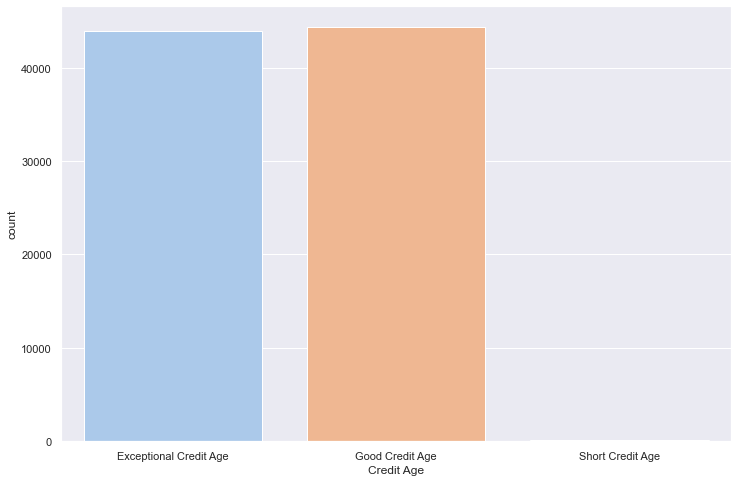

In [231]:
plt.figure(figsize=(12,8))
sns.countplot(data['Credit Age'], palette = 'pastel')
plt.show()

In [232]:
data = data.join(pd.get_dummies(data['Credit Age'],drop_first = True))

In [233]:
data = data.drop(['Credit Age','Years of Credit History'], axis =1)
data.head()

,Loan Status,Term,Purpose,Monthly Debt,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Medium Loan,Small Loan,Credit Good,Credit Very Good,High Income,Low Income,Emp Level Mid,Emp Senior,Home Mortgage,Own Home,Rent,Good Credit Age,Short Credit Age
0,1,0,3,5214.74,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,1,0,1,0,0,0,0,1,1,0,0,0,0
1,1,0,1,33295.98,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,1,0,1,0,0,0,0,1,1,0,0,0,0
3,1,1,1,8741.90,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,1,0,1,0,0,0,0,0,0,1,0,1,0
4,1,0,1,20639.70,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,1,0,1,0,0,0,1,0,0,0,1,1,0
5,0,0,1,16367.74,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0,1,0,1,0,0,0,0,1,1,0,0,0,0


## 10. 'Months since last delinquent' Column

In [234]:
data['Months since last delinquent'].mode()

0    13.0
dtype: float64

In [235]:
data['Months since last delinquent'].value_counts().head()

13.0    832
12.0    799
15.0    788
14.0    785
10.0    783
Name: Months since last delinquent, dtype: int64

* please Notice that in USA 'Late payments generally wont end up on your credit reports for at least 30 days after you miss the payment. so you have almost 60 day to pay 
* if you notice the Credit Score is greater that 700,meaning that they have good - Excellent credit score
* Which means those Nan Values as 0 , I mean 0 month having a late payment

In [236]:
data['Months since last delinquent'].fillna(0,inplace=True)

## 11. 'Number of Credit Problems' Column

In [237]:
def credit_prob(x):
    if x==0:
         return 'No Credit Problem'
    elif x>0 and x<5:
        return 'Some Credit promblem'
    else:
        return 'Major Credit Problems'

In [238]:
data['Credit Problems'] = data['Number of Credit Problems'].apply(credit_prob)

In [239]:
data['Credit Problems'].value_counts()

No Credit Problem        76130
Some Credit promblem     12308
Major Credit Problems       78
Name: Credit Problems, dtype: int64

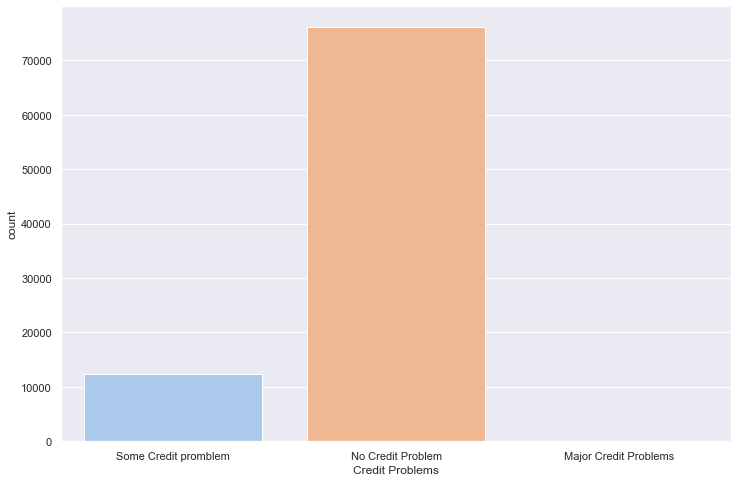

In [240]:
plt.figure(figsize=(12,8))
sns.countplot(data['Credit Problems'], palette = 'pastel')
plt.show()

* Looking at the graph above, we establish a common asumption that loans are generally not given to people having credit problems

In [241]:
data = data.join(pd.get_dummies(data['Credit Problems'],drop_first = True))

In [242]:
data = data.drop(['Credit Problems','Number of Credit Problems'], axis=1)

In [243]:
data.head()

,Loan Status,Term,Purpose,Monthly Debt,Months since last delinquent,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Medium Loan,Small Loan,Credit Good,Credit Very Good,High Income,Low Income,Emp Level Mid,Emp Senior,Home Mortgage,Own Home,Rent,Good Credit Age,Short Credit Age,No Credit Problem,Some Credit promblem
0,1,0,3,5214.74,0.0,6.0,228190.0,416746.0,1.0,0.0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1
1,1,0,1,33295.98,8.0,35.0,229976.0,850784.0,0.0,0.0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0
3,1,1,1,8741.90,0.0,9.0,256329.0,386958.0,0.0,0.0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0
4,1,0,1,20639.70,0.0,15.0,253460.0,427174.0,0.0,0.0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0
5,0,0,1,16367.74,0.0,6.0,215308.0,272448.0,0.0,0.0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0


## 12. 'Maximum Open Credit' Column

In [244]:
data['Maximum Open Credit'].mode()

0    0.0
dtype: float64

In [245]:
data['Maximum Open Credit'].fillna(0, inplace=True)

## 13. 'Bankruptcies' Column

* Bankruptcies and Number of Credit Problems are related

In [246]:
data['Bankruptcies'].mode()

0    0.0
dtype: float64

In [247]:
data['Bankruptcies'].fillna(0,inplace=True)

In [248]:
def bankrupt(x):
    if x==0:
         return 'No bankruptcies'
    elif x>0 and x<3:
        return 'Some Bankruptcies'
    else:
        return 'Many Bankruptcies'

In [249]:
data['Bankruptcies'] = data['Bankruptcies'].apply(bankrupt)

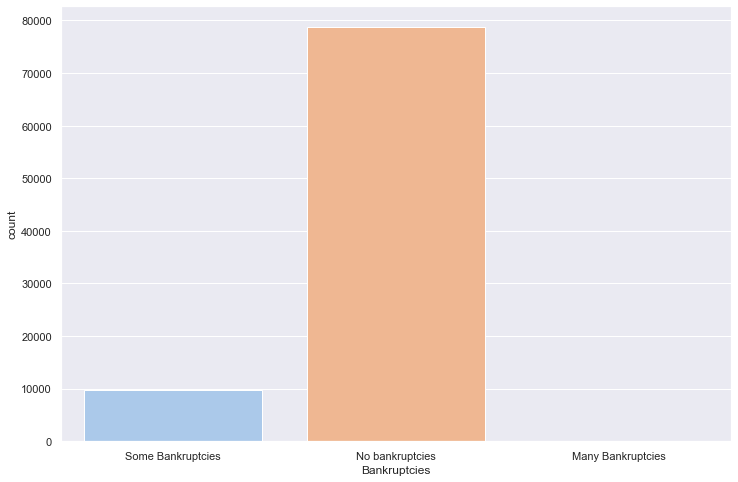

In [250]:
plt.figure(figsize=(12,8))
sns.countplot(data['Bankruptcies'], palette = 'pastel')
plt.show()

In [251]:
data = data.join(pd.get_dummies(data['Bankruptcies'],drop_first = True))

In [252]:
data = data.drop(['Bankruptcies'],axis=1)
data.head()

,Loan Status,Term,Purpose,Monthly Debt,Months since last delinquent,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Tax Liens,Medium Loan,Small Loan,Credit Good,Credit Very Good,High Income,Low Income,Emp Level Mid,Emp Senior,Home Mortgage,Own Home,Rent,Good Credit Age,Short Credit Age,No Credit Problem,Some Credit promblem,No bankruptcies,Some Bankruptcies
0,1,0,3,5214.74,0.0,6.0,228190.0,416746.0,0.0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1
1,1,0,1,33295.98,8.0,35.0,229976.0,850784.0,0.0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0
3,1,1,1,8741.90,0.0,9.0,256329.0,386958.0,0.0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0
4,1,0,1,20639.70,0.0,15.0,253460.0,427174.0,0.0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0
5,0,0,1,16367.74,0.0,6.0,215308.0,272448.0,0.0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0


## 14. 'Tax Liens' Columns

* Tax liens is imposed as a guarantee so people have to pay or they lose their houses

* Tax Liens has strong relation with the Number of Credit Problems

* take the look at number of liens on their property by court which would give us information about their previous commitments

In [253]:
data['Tax Liens'].fillna(0,inplace=True)

In [254]:
def tax_lien(x):
    if x==0:
         return 'No Tax Lien'
    elif x>0 and x<3:
        return 'Some Tax Liens'
    else:
        return 'Many Tax Liens'

In [255]:
data['Tax Liens'] = data['Tax Liens'].apply(tax_lien)

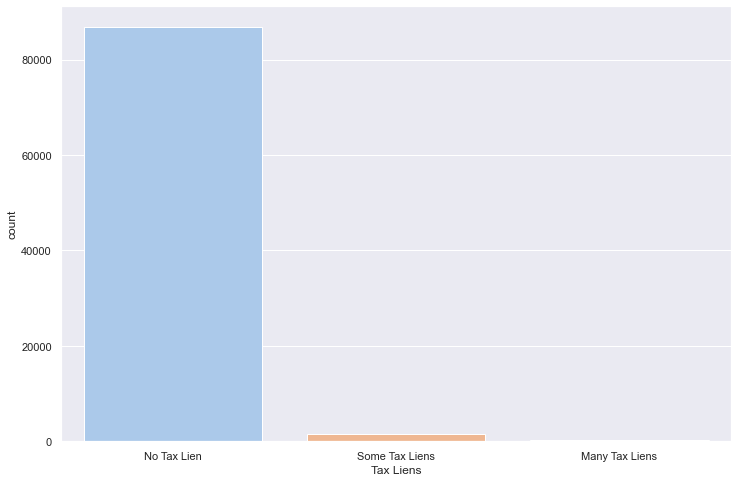

In [256]:
plt.figure(figsize=(12,8))
sns.countplot(data['Tax Liens'], palette = 'pastel')
plt.show()

In [257]:
data = data.join(pd.get_dummies(data['Tax Liens'],drop_first = True))

In [258]:
data = data.drop(['Tax Liens'],axis=1)
data.head()

,Loan Status,Term,Purpose,Monthly Debt,Months since last delinquent,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Medium Loan,Small Loan,Credit Good,Credit Very Good,High Income,Low Income,Emp Level Mid,Emp Senior,Home Mortgage,Own Home,Rent,Good Credit Age,Short Credit Age,No Credit Problem,Some Credit promblem,No bankruptcies,Some Bankruptcies,No Tax Lien,Some Tax Liens
0,1,0,3,5214.74,0.0,6.0,228190.0,416746.0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,1,0
1,1,0,1,33295.98,8.0,35.0,229976.0,850784.0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0
3,1,1,1,8741.90,0.0,9.0,256329.0,386958.0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
4,1,0,1,20639.70,0.0,15.0,253460.0,427174.0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0
5,0,0,1,16367.74,0.0,6.0,215308.0,272448.0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0


In [259]:
data.shape

(88516, 27)

In [260]:
y = data['Loan Status']
X = data.drop(['Loan Status'],axis=1)

In [261]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [262]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [263]:
lg=LogisticRegression()
rf=RandomForestClassifier()
gbm=GradientBoostingClassifier()
xgb=XGBClassifier()
lgbm=LGBMClassifier()
cboost=CatBoostClassifier()

In [264]:
from sklearn.metrics import accuracy_score
for model,name in zip([lg,rf,gbm,xgb,lgbm,cboost],['lg','rf','gbm','xgb','lgbm','cboost']):
    model.fit(x_train,y_train)
    print(name,'model generates accuracy score of',accuracy_score(y_test,model.predict(x_test)))

lg model generates accuracy score of 0.7418662449164031
rf model generates accuracy score of 0.7442385901491189
gbm model generates accuracy score of 0.7419792137370086
xgb model generates accuracy score of 0.7415273384545865
lgbm model generates accuracy score of 0.7426570266606417
Learning rate set to 0.063523
0:	learn: 0.6761471	total: 172ms	remaining: 2m 52s
1:	learn: 0.6612716	total: 198ms	remaining: 1m 38s
2:	learn: 0.6481849	total: 212ms	remaining: 1m 10s
3:	learn: 0.6365018	total: 228ms	remaining: 56.9s
4:	learn: 0.6263436	total: 244ms	remaining: 48.6s
5:	learn: 0.6178537	total: 274ms	remaining: 45.3s
6:	learn: 0.6101872	total: 289ms	remaining: 41s
7:	learn: 0.6034985	total: 306ms	remaining: 38s
8:	learn: 0.5978013	total: 319ms	remaining: 35.1s
9:	learn: 0.5925793	total: 367ms	remaining: 36.4s
10:	learn: 0.5884169	total: 384ms	remaining: 34.5s
11:	learn: 0.5844293	total: 412ms	remaining: 33.9s
12:	learn: 0.5808153	total: 426ms	remaining: 32.4s
13:	learn: 0.5776080	total: 445ms	

158:	learn: 0.5457952	total: 3.66s	remaining: 19.3s
159:	learn: 0.5457257	total: 3.67s	remaining: 19.3s
160:	learn: 0.5456768	total: 3.69s	remaining: 19.2s
161:	learn: 0.5456378	total: 3.7s	remaining: 19.2s
162:	learn: 0.5455863	total: 3.72s	remaining: 19.1s
163:	learn: 0.5455272	total: 3.73s	remaining: 19s
164:	learn: 0.5454759	total: 3.75s	remaining: 19s
165:	learn: 0.5453921	total: 3.77s	remaining: 18.9s
166:	learn: 0.5453381	total: 3.78s	remaining: 18.9s
167:	learn: 0.5452842	total: 3.8s	remaining: 18.8s
168:	learn: 0.5452596	total: 3.84s	remaining: 18.9s
169:	learn: 0.5451998	total: 3.86s	remaining: 18.9s
170:	learn: 0.5451449	total: 3.88s	remaining: 18.8s
171:	learn: 0.5451046	total: 3.91s	remaining: 18.8s
172:	learn: 0.5450782	total: 3.93s	remaining: 18.8s
173:	learn: 0.5450144	total: 3.95s	remaining: 18.7s
174:	learn: 0.5449554	total: 3.98s	remaining: 18.7s
175:	learn: 0.5448956	total: 3.99s	remaining: 18.7s
176:	learn: 0.5448163	total: 4.01s	remaining: 18.6s
177:	learn: 0.5447

325:	learn: 0.5364648	total: 7.46s	remaining: 15.4s
326:	learn: 0.5364413	total: 7.48s	remaining: 15.4s
327:	learn: 0.5363811	total: 7.51s	remaining: 15.4s
328:	learn: 0.5363131	total: 7.54s	remaining: 15.4s
329:	learn: 0.5362588	total: 7.55s	remaining: 15.3s
330:	learn: 0.5361814	total: 7.57s	remaining: 15.3s
331:	learn: 0.5361461	total: 7.59s	remaining: 15.3s
332:	learn: 0.5361295	total: 7.61s	remaining: 15.2s
333:	learn: 0.5360756	total: 7.63s	remaining: 15.2s
334:	learn: 0.5360410	total: 7.65s	remaining: 15.2s
335:	learn: 0.5359814	total: 7.67s	remaining: 15.2s
336:	learn: 0.5359314	total: 7.7s	remaining: 15.1s
337:	learn: 0.5358512	total: 7.73s	remaining: 15.1s
338:	learn: 0.5358165	total: 7.76s	remaining: 15.1s
339:	learn: 0.5357783	total: 7.81s	remaining: 15.2s
340:	learn: 0.5357072	total: 7.83s	remaining: 15.1s
341:	learn: 0.5356388	total: 7.86s	remaining: 15.1s
342:	learn: 0.5355962	total: 7.88s	remaining: 15.1s
343:	learn: 0.5355512	total: 7.91s	remaining: 15.1s
344:	learn: 0

487:	learn: 0.5285006	total: 11.3s	remaining: 11.9s
488:	learn: 0.5284466	total: 11.3s	remaining: 11.8s
489:	learn: 0.5284142	total: 11.4s	remaining: 11.8s
490:	learn: 0.5283465	total: 11.4s	remaining: 11.8s
491:	learn: 0.5283075	total: 11.4s	remaining: 11.8s
492:	learn: 0.5282782	total: 11.4s	remaining: 11.7s
493:	learn: 0.5282422	total: 11.5s	remaining: 11.7s
494:	learn: 0.5281984	total: 11.5s	remaining: 11.7s
495:	learn: 0.5281456	total: 11.5s	remaining: 11.7s
496:	learn: 0.5280980	total: 11.5s	remaining: 11.6s
497:	learn: 0.5280341	total: 11.5s	remaining: 11.6s
498:	learn: 0.5280010	total: 11.5s	remaining: 11.6s
499:	learn: 0.5279610	total: 11.6s	remaining: 11.6s
500:	learn: 0.5279027	total: 11.6s	remaining: 11.5s
501:	learn: 0.5278467	total: 11.6s	remaining: 11.5s
502:	learn: 0.5277697	total: 11.7s	remaining: 11.5s
503:	learn: 0.5277224	total: 11.7s	remaining: 11.5s
504:	learn: 0.5276724	total: 11.7s	remaining: 11.5s
505:	learn: 0.5276141	total: 11.7s	remaining: 11.5s
506:	learn: 

654:	learn: 0.5210173	total: 15s	remaining: 7.9s
655:	learn: 0.5209736	total: 15s	remaining: 7.87s
656:	learn: 0.5209379	total: 15s	remaining: 7.85s
657:	learn: 0.5208841	total: 15s	remaining: 7.82s
658:	learn: 0.5208352	total: 15.1s	remaining: 7.79s
659:	learn: 0.5207781	total: 15.1s	remaining: 7.77s
660:	learn: 0.5207297	total: 15.1s	remaining: 7.74s
661:	learn: 0.5206762	total: 15.1s	remaining: 7.71s
662:	learn: 0.5206126	total: 15.1s	remaining: 7.68s
663:	learn: 0.5205777	total: 15.2s	remaining: 7.67s
664:	learn: 0.5205378	total: 15.2s	remaining: 7.64s
665:	learn: 0.5204818	total: 15.2s	remaining: 7.63s
666:	learn: 0.5204532	total: 15.2s	remaining: 7.6s
667:	learn: 0.5204155	total: 15.3s	remaining: 7.58s
668:	learn: 0.5203634	total: 15.3s	remaining: 7.55s
669:	learn: 0.5203175	total: 15.3s	remaining: 7.53s
670:	learn: 0.5202925	total: 15.3s	remaining: 7.5s
671:	learn: 0.5202501	total: 15.3s	remaining: 7.47s
672:	learn: 0.5202073	total: 15.3s	remaining: 7.45s
673:	learn: 0.5201673	t

824:	learn: 0.5142729	total: 18.5s	remaining: 3.92s
825:	learn: 0.5142071	total: 18.5s	remaining: 3.9s
826:	learn: 0.5141625	total: 18.5s	remaining: 3.88s
827:	learn: 0.5141374	total: 18.5s	remaining: 3.85s
828:	learn: 0.5140985	total: 18.6s	remaining: 3.83s
829:	learn: 0.5140532	total: 18.6s	remaining: 3.8s
830:	learn: 0.5139997	total: 18.6s	remaining: 3.78s
831:	learn: 0.5139716	total: 18.6s	remaining: 3.76s
832:	learn: 0.5139223	total: 18.6s	remaining: 3.73s
833:	learn: 0.5138750	total: 18.6s	remaining: 3.71s
834:	learn: 0.5138368	total: 18.7s	remaining: 3.69s
835:	learn: 0.5138007	total: 18.7s	remaining: 3.66s
836:	learn: 0.5137837	total: 18.7s	remaining: 3.64s
837:	learn: 0.5137378	total: 18.7s	remaining: 3.61s
838:	learn: 0.5137039	total: 18.7s	remaining: 3.59s
839:	learn: 0.5136630	total: 18.7s	remaining: 3.57s
840:	learn: 0.5135896	total: 18.7s	remaining: 3.54s
841:	learn: 0.5135522	total: 18.8s	remaining: 3.52s
842:	learn: 0.5135170	total: 18.8s	remaining: 3.5s
843:	learn: 0.5

984:	learn: 0.5080819	total: 21.3s	remaining: 325ms
985:	learn: 0.5080402	total: 21.3s	remaining: 303ms
986:	learn: 0.5079952	total: 21.4s	remaining: 281ms
987:	learn: 0.5079754	total: 21.4s	remaining: 260ms
988:	learn: 0.5079335	total: 21.4s	remaining: 238ms
989:	learn: 0.5079006	total: 21.4s	remaining: 216ms
990:	learn: 0.5078562	total: 21.4s	remaining: 195ms
991:	learn: 0.5078148	total: 21.4s	remaining: 173ms
992:	learn: 0.5077798	total: 21.5s	remaining: 151ms
993:	learn: 0.5077576	total: 21.5s	remaining: 130ms
994:	learn: 0.5077272	total: 21.5s	remaining: 108ms
995:	learn: 0.5076792	total: 21.5s	remaining: 86.4ms
996:	learn: 0.5076438	total: 21.5s	remaining: 64.8ms
997:	learn: 0.5076074	total: 21.6s	remaining: 43.2ms
998:	learn: 0.5075908	total: 21.6s	remaining: 21.6ms
999:	learn: 0.5075406	total: 21.6s	remaining: 0us
cboost model generates accuracy score of 0.7442385901491189
